
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)

- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Corelation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. (remember how we did a sns.pairplot(df[[ "cylinders", "mpg","model_year"]]) and sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]]) and others. ) 

remember to have fun with this 

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset

df = pd.read_csv(r"C:\Users\spide\vscode\ETE 4990\Labs\Understanding Data\student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [3]:
df.drop(["id"], axis = 1, inplace = True)
df.drop(["Degree"], axis = 1, inplace = True)
df.drop(["CGPA"], axis = 1, inplace = True)
df.drop(["City"], axis = 1, inplace = True)
df.drop(["Gender"], axis = 1, inplace = True)
df.drop(["Profession"], axis = 1, inplace = True)
df.drop(["Dietary Habits"], axis = 1, inplace = True)

Dropped unimportant categories

In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    27901 non-null  float64
 1   Academic Pressure                      27901 non-null  float64
 2   Work Pressure                          27901 non-null  float64
 3   Study Satisfaction                     27901 non-null  float64
 4   Job Satisfaction                       27901 non-null  float64
 5   Sleep Duration                         27901 non-null  object 
 6   Have you ever had suicidal thoughts ?  27901 non-null  object 
 7   Work/Study Hours                       27901 non-null  float64
 8   Financial Stress                       27901 non-null  object 
 9   Family History of Mental Illness       27901 non-null  object 
 10  Depression                             27901 non-null  int64  
dtypes:

In [5]:
df.head()

,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,5.0,0.0,2.0,0.0,'5-6 hours',Yes,3.0,1.0,No,1
1,24.0,2.0,0.0,5.0,0.0,'5-6 hours',No,3.0,2.0,Yes,0
2,31.0,3.0,0.0,5.0,0.0,'Less than 5 hours',No,9.0,1.0,Yes,0
3,28.0,3.0,0.0,2.0,0.0,'7-8 hours',Yes,4.0,5.0,Yes,1
4,25.0,4.0,0.0,3.0,0.0,'5-6 hours',Yes,1.0,1.0,No,0


enumerate categories sleep, HYEHST, Sleep DUration

In [6]:
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
df['Sleep Duration'] = df['Sleep Duration'].map({'5-6 hours': 1, 'Less than 5 hours': 0, '7-8 hours': 2, 'More  than 8 hours': 3})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    27901 non-null  float64
 1   Academic Pressure                      27901 non-null  float64
 2   Work Pressure                          27901 non-null  float64
 3   Study Satisfaction                     27901 non-null  float64
 4   Job Satisfaction                       27901 non-null  float64
 5   Sleep Duration                         0 non-null      float64
 6   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 7   Work/Study Hours                       27901 non-null  float64
 8   Financial Stress                       27901 non-null  object 
 9   Family History of Mental Illness       27901 non-null  int64  
 10  Depression                             27901 non-null  int64  
dtypes:

In [8]:
df.corr()

ValueError: could not convert string to float: '?'

In [12]:
print(df['Financial Stress'].unique())

['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [13]:
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')


In [14]:
df.corr()

,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Age,1.000000,-0.075803,0.002015,0.009235,-0.000432,-0.113502,-0.032928,-0.095026,-0.004861,-0.226422
Academic Pressure,-0.075803,1.000000,-0.022231,-0.110988,-0.024945,0.261510,0.095970,0.151706,0.030069,0.474835
Work Pressure,0.002015,-0.022231,1.000000,-0.021145,0.770652,-0.001003,-0.005468,0.001883,-0.006207,-0.003351
Study Satisfaction,0.009235,-0.110988,-0.021145,1.000000,-0.021907,-0.083490,-0.036441,-0.065107,-0.003880,-0.167971
Job Satisfaction,-0.000432,-0.024945,0.770652,-0.021907,1.000000,-0.003389,-0.005222,0.005248,-0.010009,-0.003482
Have you ever had suicidal thoughts ?,-0.113502,0.261510,-0.001003,-0.083490,-0.003389,1.000000,0.121315,0.209151,0.026213,0.546277
Work/Study Hours,-0.032928,0.095970,-0.005468,-0.036441,-0.005222,0.121315,1.000000,0.075283,0.017434,0.208563
Financial Stress,-0.095026,0.151706,0.001883,-0.065107,0.005248,0.209151,0.075283,1.000000,0.008516,0.363591
Family History of Mental Illness,-0.004861,0.030069,-0.006207,-0.003880,-0.010009,0.026213,0.017434,0.008516,1.000000,0.053430
Depression,-0.226422,0.474835,-0.003351,-0.167971,-0.003482,0.546277,0.208563,0.363591,0.053430,1.000000


<Axes: >

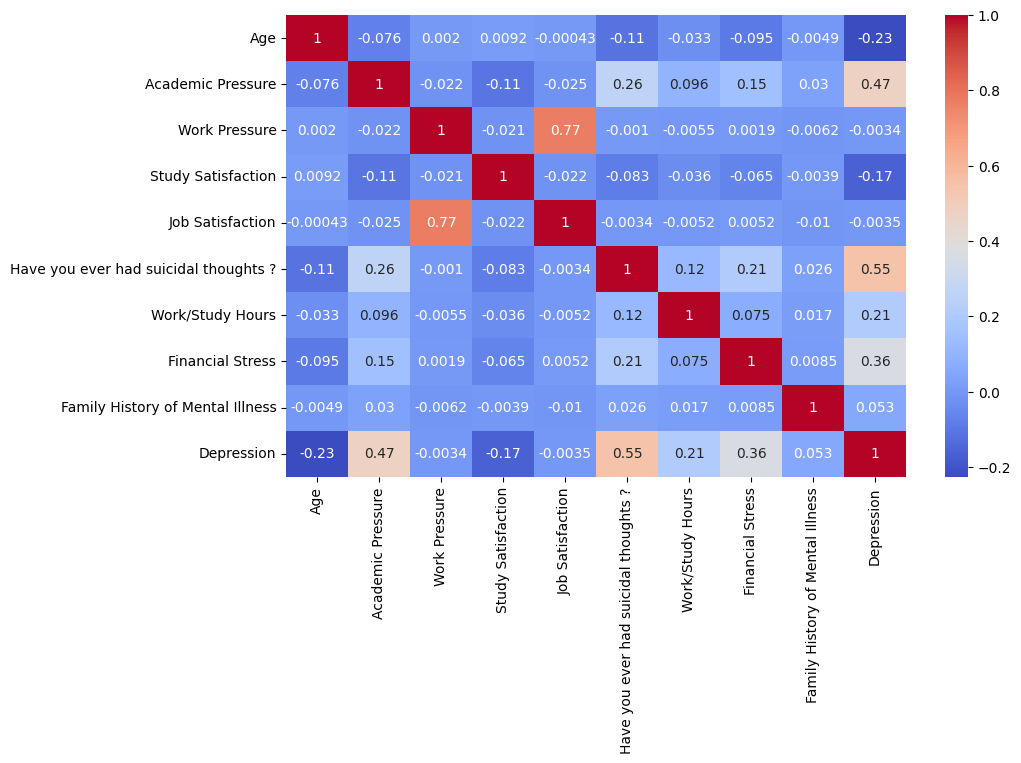

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Sleep  can be dropped

In [10]:
df.drop(["Sleep Duration"], axis = 1, inplace = True)

<Axes: >

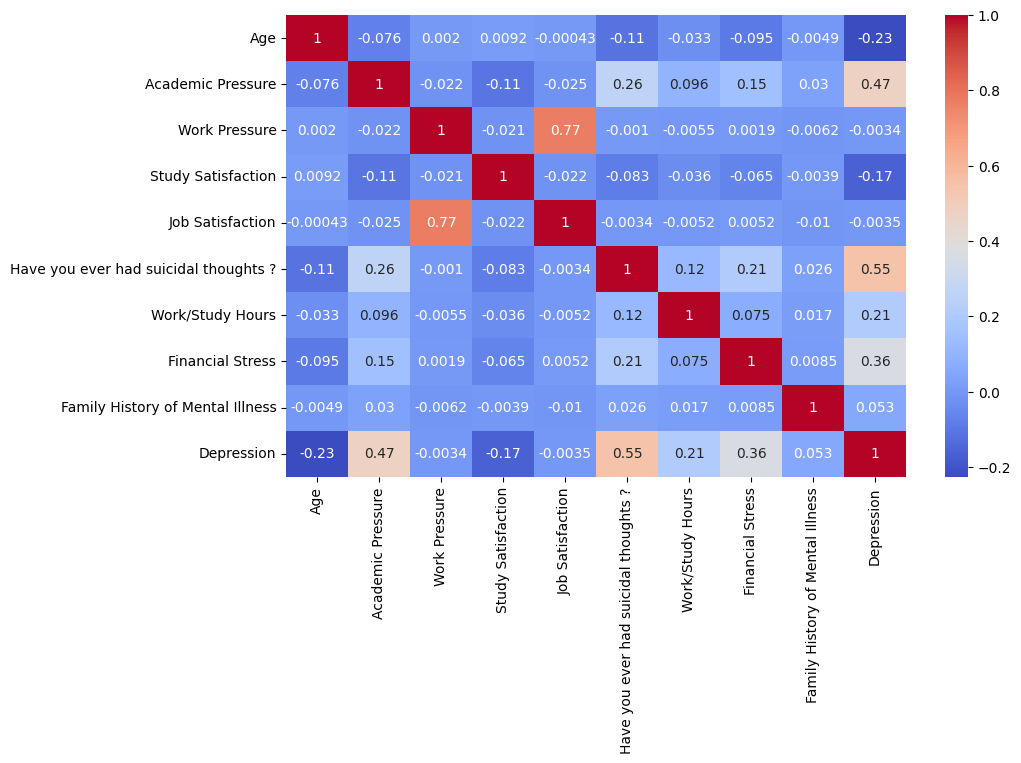

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Focus heatmap to higher corr data like HYEHST, SA Stress, F stress,Depression

In [20]:
focused_df = df[['Have you ever had suicidal thoughts ?', "Work/Study Hours", 'Financial Stress', 'Depression', 'Academic Pressure']]


In [21]:
focused_df.corr()

,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression,Academic Pressure
Have you ever had suicidal thoughts ?,1.000000,0.121315,0.209151,0.546277,0.261510
Work/Study Hours,0.121315,1.000000,0.075283,0.208563,0.095970
Financial Stress,0.209151,0.075283,1.000000,0.363591,0.151706
Depression,0.546277,0.208563,0.363591,1.000000,0.474835
Academic Pressure,0.261510,0.095970,0.151706,0.474835,1.000000


<Axes: >

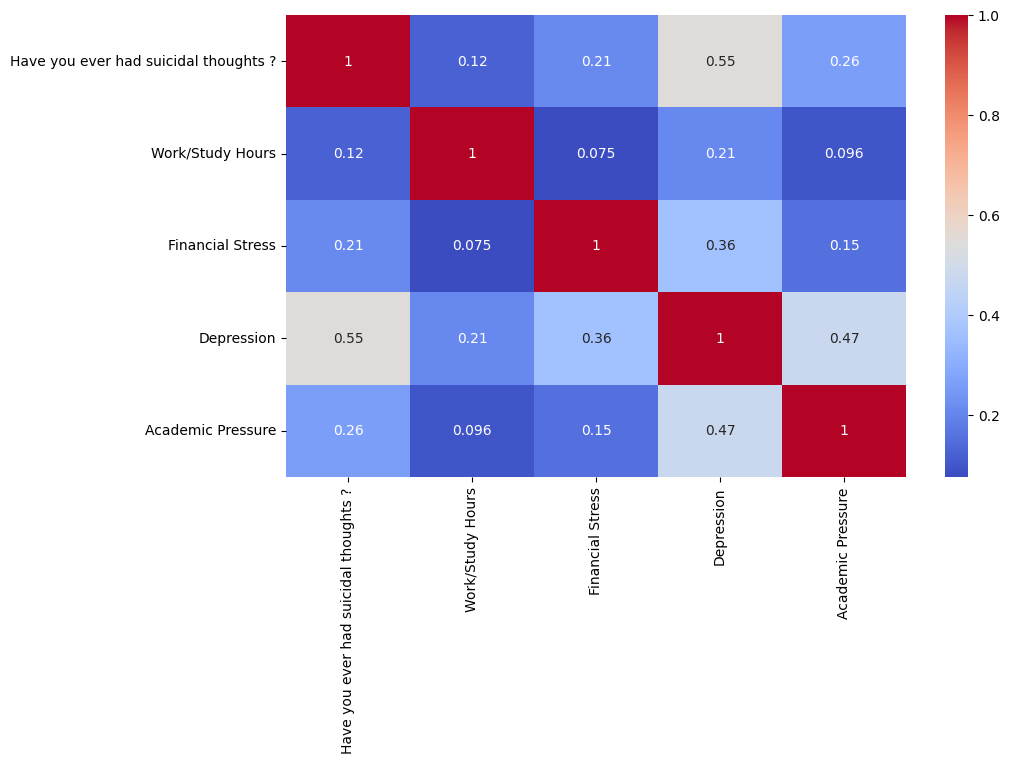

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(focused_df.corr(), annot=True, cmap="coolwarm")

# Pair Plots

<Figure size 1500x1000 with 0 Axes>

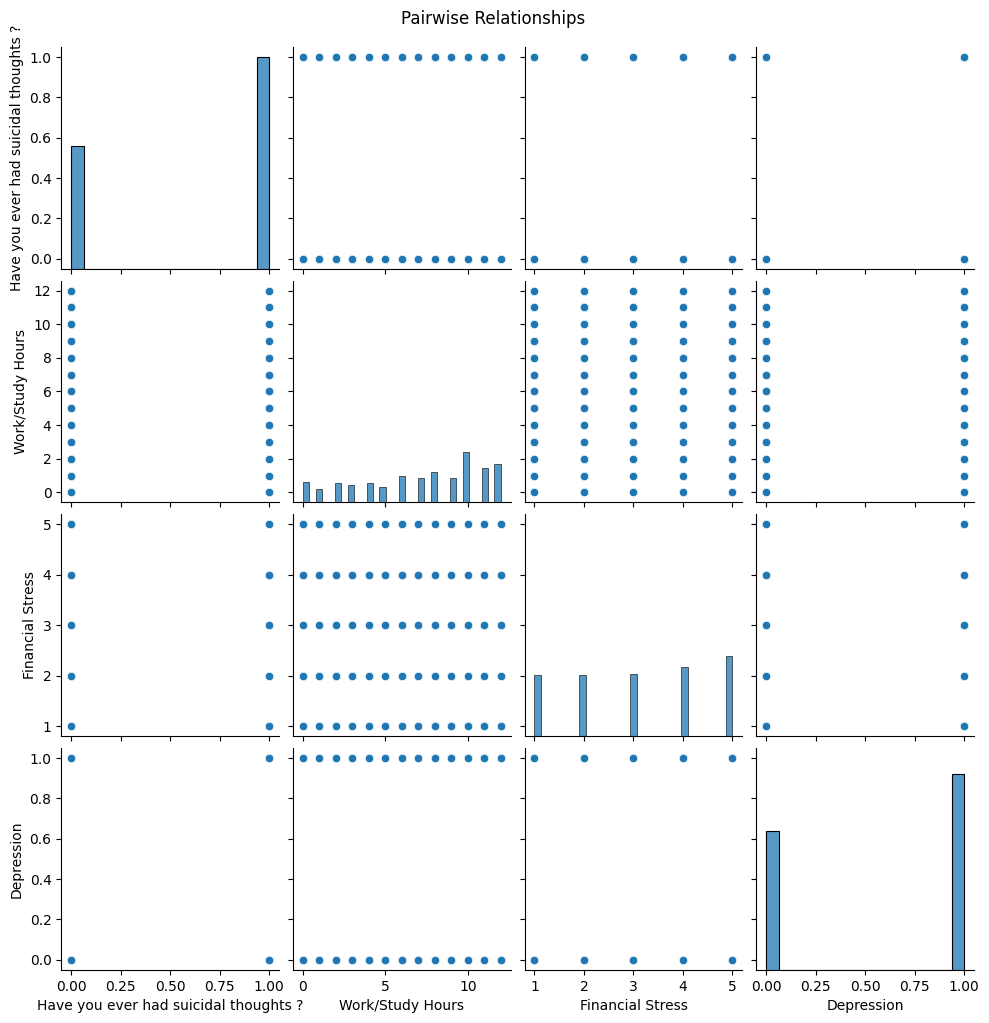

In [23]:
plt.figure(figsize = (15, 10))
sns.pairplot(focused_df[['Have you ever had suicidal thoughts ?', "Work/Study Hours", 'Financial Stress', 'Depression']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

DOesn't tell memuch probably due to low corr values

BOX PLOTS Weighing depression vs various categories

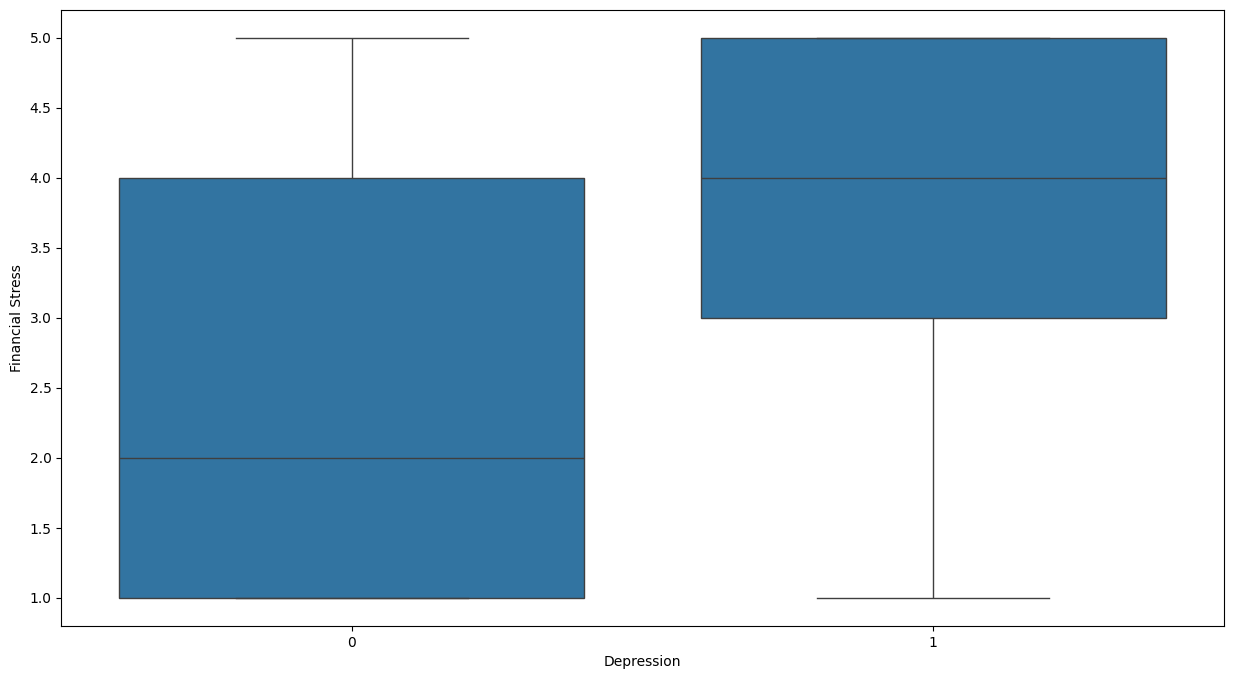

In [24]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "Depression", y = "Financial Stress", data = df, legend=False)
plt.show()

FS proportional to depression makes sense the more financial troubles faced the harder everything else becomes

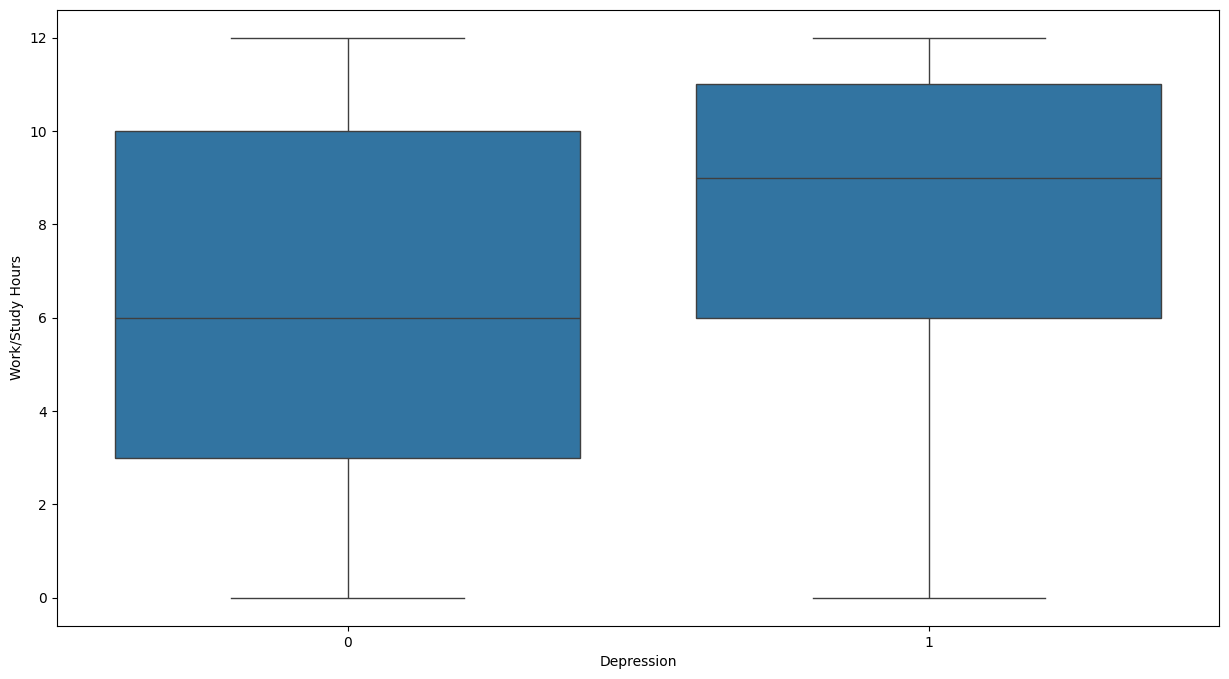

In [25]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "Depression", y = "Work/Study Hours", data = df, legend=False)
plt.show()

Seems like the more you work the more suceptable you are to depression, working yourself to death

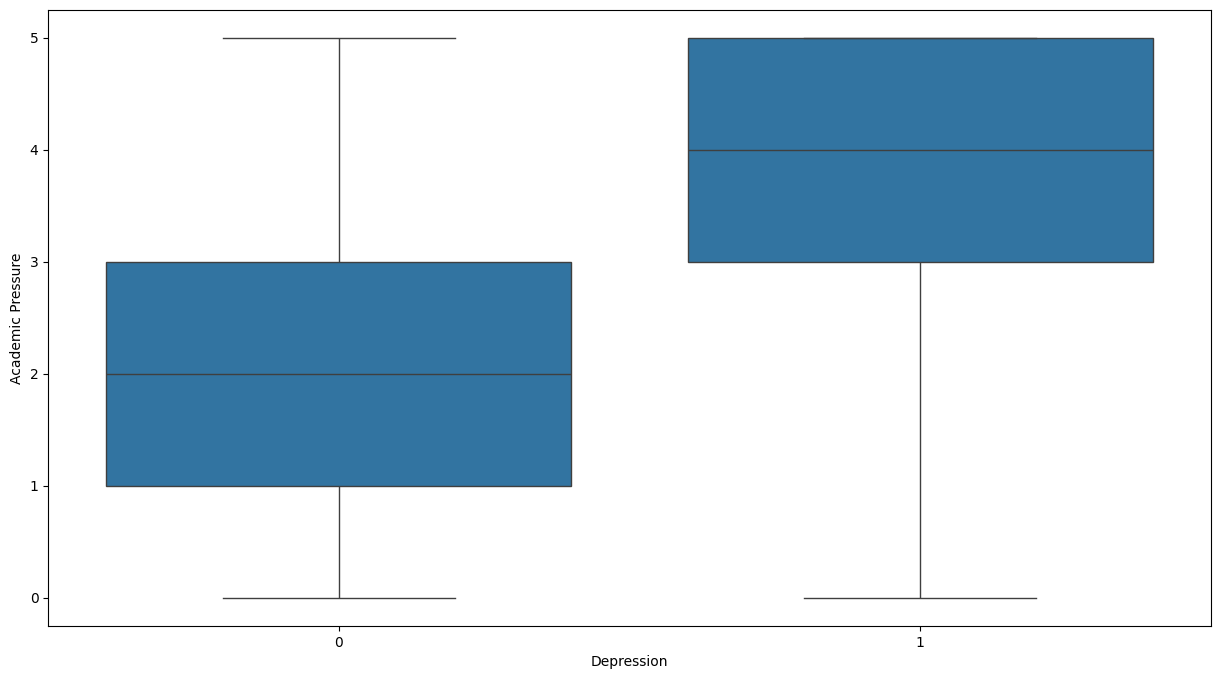

In [27]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "Depression", y = "Academic Pressure", data = df, legend=False)
plt.show()

Relativly high correlation where even those without depression reate academic pressure from 1-3 where those with have a baselie of 3

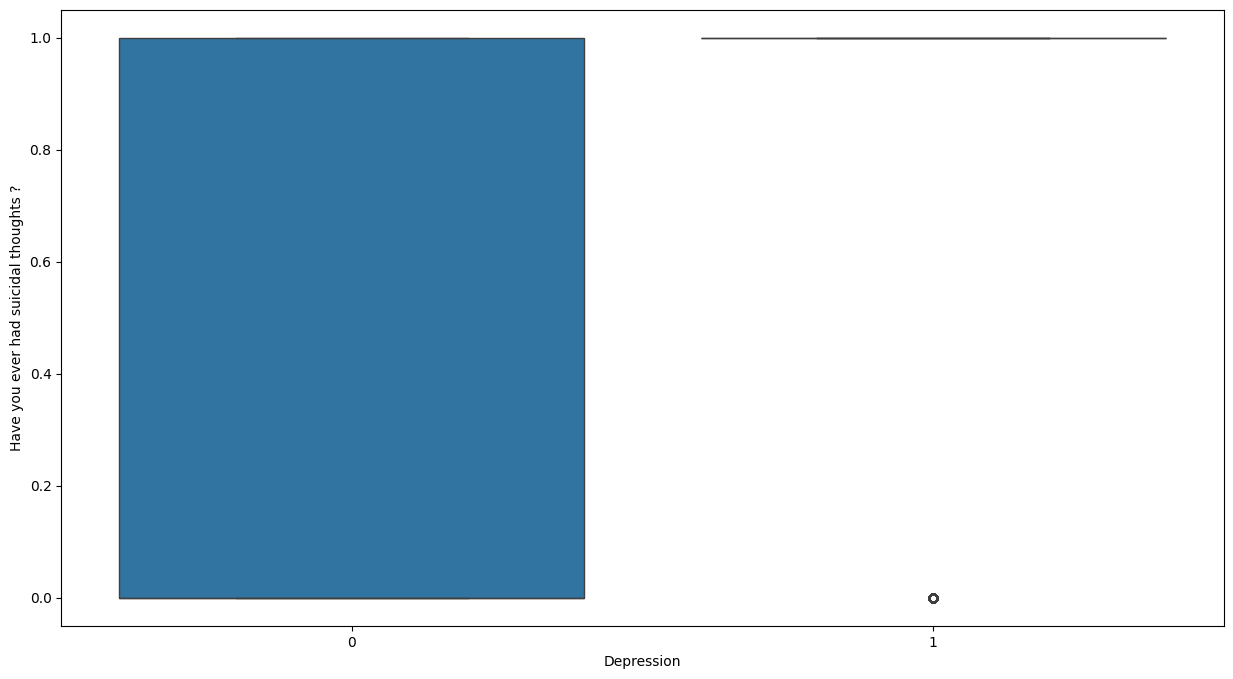

In [28]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "Depression", y = "Have you ever had suicidal thoughts ?", data = df, legend=False)
plt.show()

Pretty straight forward, those with depression have had suicidal thoughts whilst those without have a decent spread

# Histograms


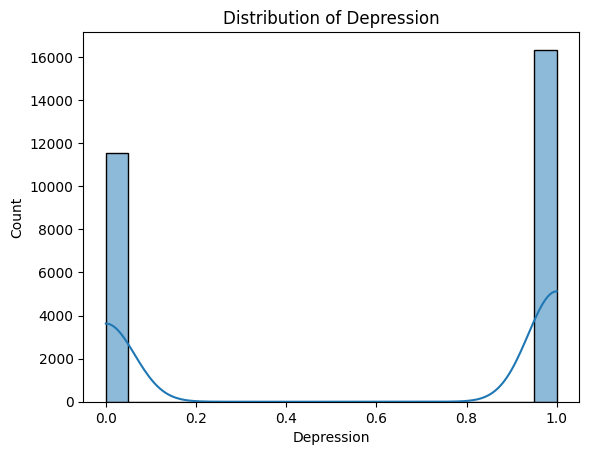

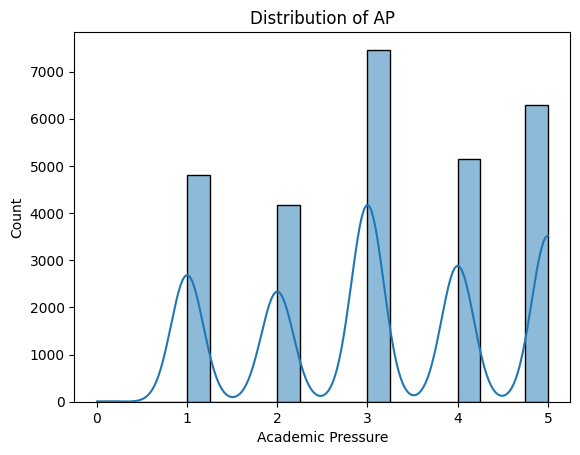

In [29]:
sns.histplot(df["Depression"], kde=True, bins=20)
plt.title("Distribution of Depression")
plt.show()

# Distribution of key feature
sns.histplot(df["Academic Pressure"], kde=True, bins=20)
plt.title("Distribution of AP")
plt.show()

3 seems high since both boxplot categories share that number

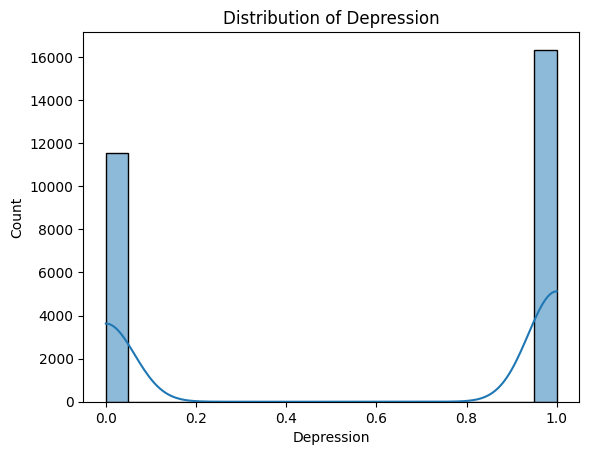

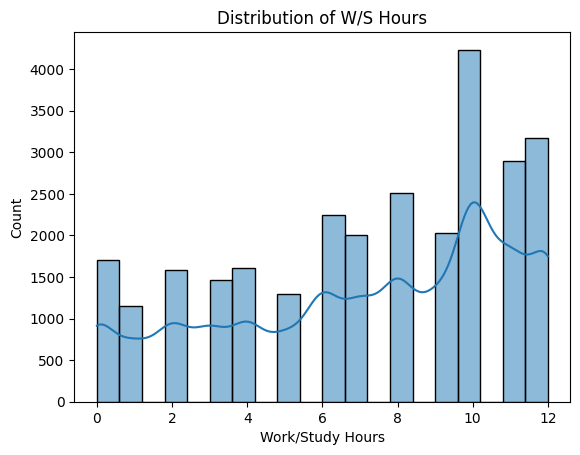

In [30]:
sns.histplot(df["Depression"], kde=True, bins=20)
plt.title("Distribution of Depression")
plt.show()

# Distribution of key feature
sns.histplot(df["Work/Study Hours"], kde=True, bins=20)
plt.title("Distribution of W/S Hours")
plt.show()

High number of 10 since even part time workers works 10, and 10 study hours over a weekend seems pretty average

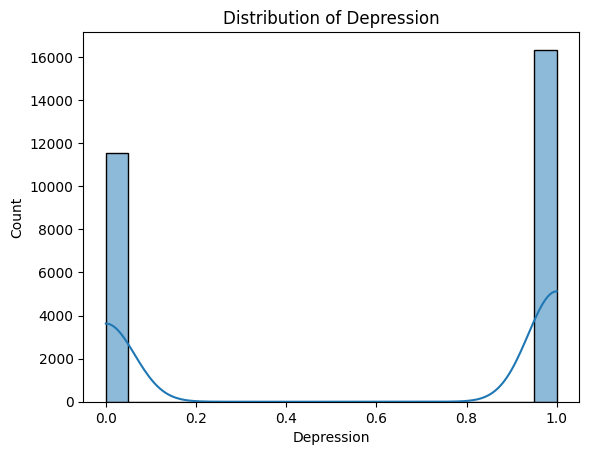

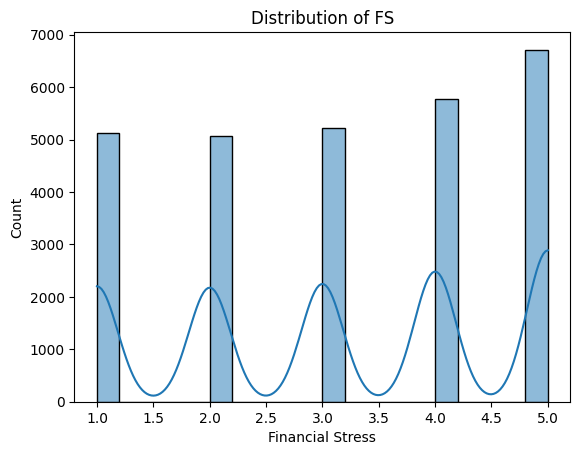

In [31]:
sns.histplot(df["Depression"], kde=True, bins=20)
plt.title("Distribution of Depression")
plt.show()

# Distribution of key feature
sns.histplot(df["Financial Stress"], kde=True, bins=20)
plt.title("Distribution of FS")
plt.show()

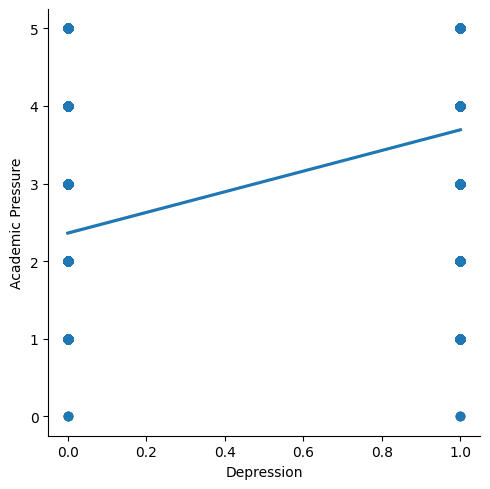

In [32]:
graph = sns.lmplot(x = "Depression", y = "Academic Pressure", data = focused_df, palette = "rainbow")
plt.show()

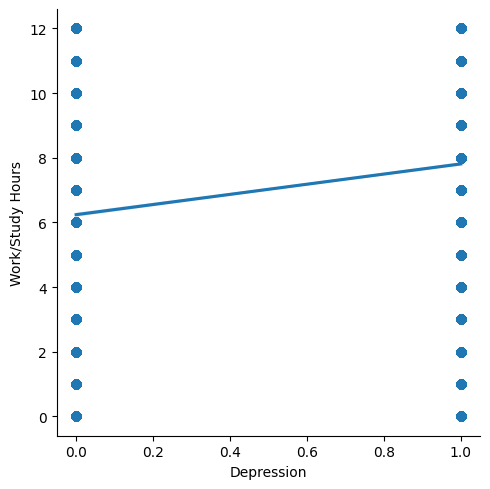

In [34]:
graph = sns.lmplot(x = "Depression", y = "Work/Study Hours", data = focused_df, palette = "rainbow")
plt.show()

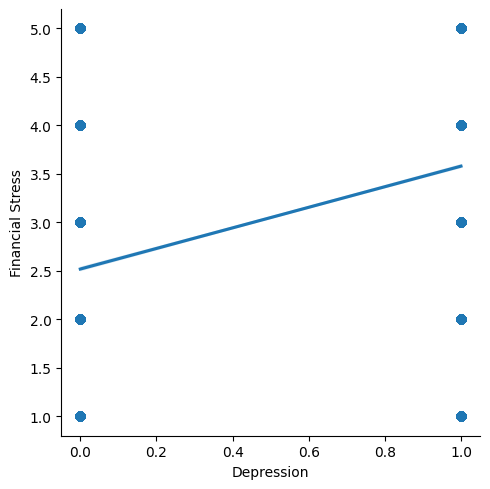

In [35]:
graph = sns.lmplot(x = "Depression", y = "Financial Stress", data = focused_df, palette = "rainbow")
plt.show()

All these Multivariate analysis make sense given both the earlier pairplots and the positive correlation values